c:\Users\Elite\Documents\Ocean\PowerCast The Electricity Price Forecasting Challenge\SMARD-Price-Predictor\virtual_env\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from font(s) Arial.
  fig.canvas.draw()
C:\Users\Elite\AppData\Local\Temp\ipykernel_1044\3839870517.py:47: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from font(s) Arial.
  plt.savefig(os.path.join(PLOTS_DIR, plot_filename), dpi=300, bbox_inches="tight")
c:\Users\Elite\Documents\Ocean\PowerCast The Electricity Price Forecasting Challenge\SMARD-Price-Predictor\virtual_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8709 (\N{EMPTY SET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


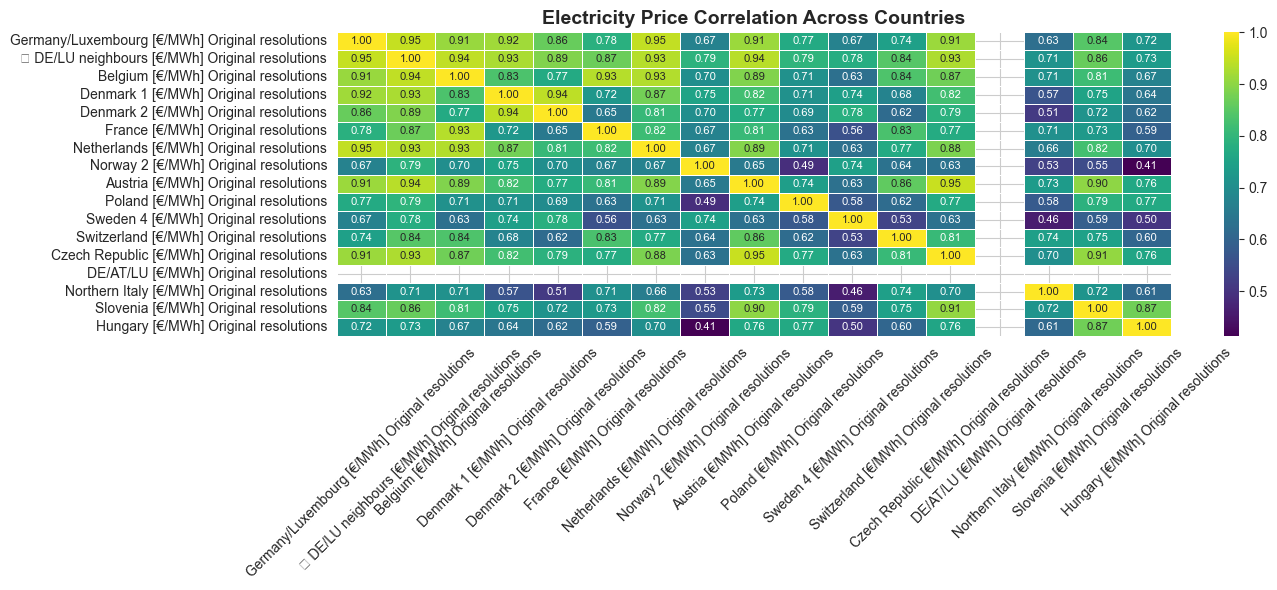

Plot saved: ../plots\electricity_price_correlation_countries.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define paths
PLOTS_DIR = "../plots"
os.makedirs(PLOTS_DIR, exist_ok=True)

# Load dataset
file_path = "../data/refined_files/refined_cleaned_Day-ahead_prices_202301010000_202503050000_Hour.csv"
df = pd.read_csv(file_path, delimiter=",")

# Convert time column to datetime
df["Start date"] = pd.to_datetime(df["Start date"], errors="coerce")

# Select country price columns
price_columns = [col for col in df.columns if "€/MWh" in col]

# Convert price columns to numeric, handling errors
df[price_columns] = df[price_columns].apply(pd.to_numeric, errors="coerce")

# Drop rows where all price values are NaN
df.dropna(subset=price_columns, how="all", inplace=True)

# Compute correlation matrix
corr_matrix = df[price_columns].corr()

# Apply seaborn style
sns.set_style("whitegrid")

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(
    corr_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5, cbar=True,
    annot_kws={"size": 8}
)

# Refining plot elements
plt.title("Electricity Price Correlation Across Countries", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Save refined figure with an improved filename
plot_filename = "electricity_price_correlation_countries.png"
plt.savefig(os.path.join(PLOTS_DIR, plot_filename), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"Plot saved: {os.path.join(PLOTS_DIR, plot_filename)}")
